In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# 1. Libraries

In [1]:
# In this exercise you will train a CNN on the FULL Cats-v-dogs dataset
# This will require you doing a lot of data preprocessing because
# the dataset isn't split into training and validation for you
# This code block has all the required inputs
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile

# 2. Skip this Preprocessing step to step 3

In [ ]:
# This code block downloads the full Cats-v-Dogs dataset and stores it as 
# cats-and-dogs.zip. It then unzips it to /tmp
# which will create a tmp/PetImages directory containing subdirectories
# called 'Cat' and 'Dog' (that's how the original researchers structured it)
# If the URL doesn't work, 
# .   visit https://www.microsoft.com/en-us/download/confirmation.aspx?id=54765
# And right click on the 'Download Manually' link to get a new URL

local_zip = 'data/cats_and_dogs.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('data/')
zip_ref.close()


In [ ]:
print(len(os.listdir('/data/PetImages/Cat/')))
print(len(os.listdir('/data/PetImages/Dog/')))

# Expected Output:
# 12501
# 12501

In [ ]:
# Use os.mkdir to create your directories
# You will need a directory for cats-v-dogs, and subdirectories for training
# and testing. These in turn will need subdirectories for 'cats' and 'dogs'
directories = [
  "/tmp/cats-v-dogs",
             "/tmp/cats-v-dogs/training/",
             "/tmp/cats-v-dogs/training/dogs",
             "/tmp/cats-v-dogs/training/cats",

             '/tmp/cats-v-dogs/testing/',
             '/tmp/cats-v-dogs/testing/cats',
             '/tmp/cats-v-dogs/testing/dogs'
             
             ]

for directory in directories:
  try:
      #YOUR CODE GOES HERE
      os.mkdir(directory)
      print(directory,  "created")
  except OSError:
      print(directory, "failed")
      pass

In [ ]:
# Write a python function called split_data which takes
# a SOURCE directory containing the files
# a TRAINING directory that a portion of the files will be copied to
# a TESTING directory that a portion of the files will be copie to
# a SPLIT SIZE to determine the portion
# The files should also be randomized, so that the training set is a random
# X% of the files, and the test set is the remaining files
# SO, for example, if SOURCE is PetImages/Cat, and SPLIT SIZE is .9
# Then 90% of the images in PetImages/Cat will be copied to the TRAINING dir
# and 10% of the images will be copied to the TESTING dir
# Also -- All images should be checked, and if they have a zero file length,
# they will not be copied over
#
# os.listdir(DIRECTORY) gives you a listing of the contents of that directory
# os.path.getsize(PATH) gives you the size of the file
# copyfile(source, destination) copies a file from source to destination
# random.sample(list, len(list)) shuffles a list
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  # YOUR CODE STARTS HERE

  all_files = []
  for file_name in os.listdir(SOURCE):
    file_path = SOURCE + file_name 

    if os.path.getsize(file_path):
      all_files.append(file_name)
    else:
      print('{} is zero length, so ignoring'.format(file_name))
      
  split = int(len(all_files)* SPLIT_SIZE)     
  shuffled = random.sample(all_files, len(all_files))

  train = shuffled[: split]
  test = shuffled[split : ]

  for file_name in train:
    copyfile(SOURCE + file_name, TRAINING + file_name)

  for file_name in test:
    copyfile(SOURCE + file_name, TESTING +file_name)

  print('total files', len(all_files))
  # YOUR CODE ENDS HERE


CAT_SOURCE_DIR = "/tmp/PetImages/Cat/"
TRAINING_CATS_DIR = "/tmp/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/tmp/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/tmp/PetImages/Dog/"
TRAINING_DOGS_DIR = "/tmp/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/tmp/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

# Expected output
# 666.jpg is zero length, so ignoring
# 11702.jpg is zero length, so ignoring

# 3. Models


In [2]:

print(len(os.listdir('data/cats_and_dogs_filtered/train/cats/')))
print(len(os.listdir('data/cats_and_dogs_filtered/train/dogs/')))
print(len(os.listdir('data/cats_and_dogs_filtered/validation/cats/')))
print(len(os.listdir("data/cats_and_dogs_filtered/validation/dogs")))



1000
1000
500
500


In [12]:
# DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
# USE AT LEAST 3 CONVOLUTION LAYERS
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation= 'relu', input_shape = (150,150,3)),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Conv2D(64, (3,3), activation= 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])


model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

In [7]:
TRAINING_DIR =  "data/cats_and_dogs_filtered/train"
train_datagen = ImageDataGenerator(rescale = 1./255) 
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR, 
    batch_size = 32,
    target_size = (150,150), class_mode = 'binary')

VALIDATION_DIR =  "data/cats_and_dogs_filtered/validation" 
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR, 
    batch_size = 64,
    target_size = (150,150),
    class_mode = 'binary')


# Expected Output:
# Found 22498 images belonging to 2 classes.
# Found 2500 images belonging to 2 classes.

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit(train_generator, epochs=10,
          steps_per_epoch = 32,
          verbose=1,
          validation_data=validation_generator)

# The expectation here is that the model will train, and that accuracy will be > 95% on both training and validation
# i.e. acc:A1 and val_acc:A2 will be visible, and both A1 and A2 will be > .9

Epoch 1/11
32/32 [==============================] - 23s 720ms/step - loss: 0.8252 - accuracy: 0.5060 - val_accuracy: 0.5020 - val_loss: 0.6924
Epoch 2/11
32/32 [==============================] - 24s 762ms/step - loss: 0.7034 - accuracy: 0.5248 - val_accuracy: 0.5040 - val_loss: 0.6913
Epoch 3/11
32/32 [==============================] - 27s 855ms/step - loss: 0.7009 - accuracy: 0.5595 - val_accuracy: 0.5240 - val_loss: 0.7003
Epoch 4/11
32/32 [==============================] - 26s 824ms/step - loss: 0.6955 - accuracy: 0.5781 - val_accuracy: 0.6560 - val_loss: 0.6579
Epoch 5/11
32/32 [==============================] - 25s 766ms/step - loss: 0.6515 - accuracy: 0.6152 - val_accuracy: 0.5900 - val_loss: 0.6751
Epoch 6/11
32/32 [==============================] - 25s 788ms/step - loss: 0.5978 - accuracy: 0.7021 - val_accuracy: 0.6860 - val_loss: 0.5968
Epoch 7/11
32/32 [==============================] - 27s 854ms/step - loss: 0.5311 - accuracy: 0.7441 - val_accuracy: 0.5960 - val_loss: 0.8049

Text(0.5, 1.0, 'Training and validation loss')

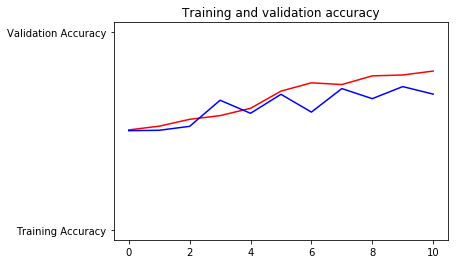

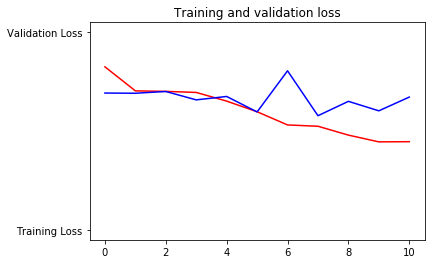

In [14]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [16]:
# Here's a codeblock just for fun. You should be able to upload an image here 
# and have it classified without crashing

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(# YOUR CODE HERE))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

SyntaxError: invalid syntax (<ipython-input-16-c099e8bfd509>, line 15)